### Machine Learning Major Research Project

Researcher: Alistair Clarke

Season: Fall 2018

In this research project, we will look at an ML program which classifies fruit images and determines the correct type or class of fruit the image belongs too.

Project Scope:

- Image Data Augmentation
- Different Models (KNN and Neural Networks)
- Features (Principal Components Analysis - PCAs)

Project Variables

- Kaggle's Fruit365 Dataset
- Google Downloaded Fruit Dataset
- Augmented Fruit Dataset

Number and Sequence of Iterations

1. Google Downloaded Fruit Dataset
2. Google Downloaded Fruit Dataset with Kaggle Fruit365 Dataset
3. Google Downloaded Fruit Dataset with Augmented Google Downloaded Fruit Dataset
4. Google Downloaded Fruit Dataset with Augmented Google Downloaded Fruit Dataset and Kaggle Fruit365 Dataset
5. Google Downloaded Fruit Dataset with Individual Augmented Google Downloaded Fruit Dataset (x6).

Split Specifications

Google Downloaded Fruit Dataset

- 70% Training, 15% Testing, 15% Validation

Kaggle's Fruit365 Dataset

- 70% Training, 15% Testing, 15% Validation

Research Questions

1. Is Augmentation Effective?
2. Which Model performs the best?
3. Which Augmentation Type is best?
4. Why were the K values for KNN chosen?
5. Why were the models (i.e. KNN, Neural Network) chosen?
6. Why were PCAs used for feature extraction?

#### Importation of Libraries

In [1]:
# Import skimage libraries

import skimage
from skimage.color import rgb2gray
from skimage import data
from skimage import exposure
from skimage import io

# Import scipy libraries

from scipy import ndimage

# Import os: to handle files

import os

# Import Pandas library

import pandas as pd

# Import numpy

import numpy as np

# Import matplotlib libraries

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Import sklearn and preamble libraries

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from preamble import *
plt.rcParams['image.cmap'] = "gray"

### Pre-Processing of Raw Data

In [2]:
# Function which gets the raw data

def load_raw_data(path):
    
    fruits = []
    
    for root, dirs, files in os.walk(path):
        for file_ in files:
            img_file = os.path.join(root, file_)
            
            # Read image file
        
            image = io.imread(img_file)

            # Convert img to grayscale

            img_gray = rgb2gray(image)
            
            # Generate a boolean array

            g_values = img_gray < 0.9 

            # Calculate the avg true pixel values

            pixel_avg = image[g_values]

            # RGB pixel values

            pixels = pixel_avg

            #print(pixels.shape)

            # Calculate the avg pixel value from all the columns (axis=0)

            rgb_avgs = np.mean(pixels, axis=(0))

            # Combine img and path to create entire directory name

            path = os.path.dirname(img_file)

            # Extract out the folder name to use as the label

            label = os.path.basename(path)
            
            # Remove white spaces from labels
            
            f_label = label.replace(" ", "")

            # Store avgs in numpy array

            img_array = np.append(rgb_avgs, f_label)
            
            fruits.append(img_array)

    return fruits

In [3]:
# Function which gets the raw data

def load_single_raw_data(path, fruit_name):
    
    fruits = []
    
    for root, dirs, files in os.walk(path):
        for file_ in files:
            img_file = os.path.join(root, file_)
            
            # Read image file
        
            image = io.imread(img_file)

            # Convert img to grayscale

            img_gray = rgb2gray(image)
            
            # Generate a boolean array

            g_values = img_gray < 0.9 

            # Calculate the avg true pixel values

            pixel_avg = image[g_values]

            # RGB pixel values

            pixels = pixel_avg

            #print(pixels.shape)

            # Calculate the avg pixel value from all the columns (axis=0)

            rgb_avgs = np.mean(pixels, axis=(0))
            
            # Remove white spaces from labels
            
            f_label = fruit_name.replace(" ", "")

            # Store avgs in numpy array

            img_array = np.append(rgb_avgs, f_label)
            
            fruits.append(img_array)

    return fruits

In [4]:
# Save Dataset as CSV function

def save_dataset(contents, file):
    
    # Convert contents to a numpy array

    all_fruits = np.array(contents)

    #print(all_fruits.shape)
    
    # Save vector of features as a csv using Pandas library

    df = pd.DataFrame(all_fruits)

    df.to_csv(file)

In [5]:
# Function to load in CSV dataset

def download_dataset(path, col_labels):
    
    # Import CSV file of features
    
    features = pd.read_csv(path)
    
    # Convert features to numpy array

    f_vector = np.array(features)

    #print(vector)
    
    # Convert feature vector to Dataframe
        
    fruit_features = pd.DataFrame(data=f_vector, columns=col_labels)
    
    # Display the first five rows

    #fruit_features.head()
    
    # Get fruit dataset properties

    #fruit_features.describe()
    
    #fruit_features.info()
    
    # Get all columns

    fruit_features.columns
    
    # Drop Index column from dataset

    fruit_features.drop('Index', axis=1, inplace=True)
    
    # View new modified dataset

    #fruit_features.head()
    
    return fruit_features

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split Dataset Function
# 70% Training, 15% Testing, 15% Validation

def splitter(feature_vector):
    
    # Stratified Sampling Split (Training and Testing)

    # Splits data once
    # 70% training, 15% testing, 15% validation

    split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)

    # Set label as the strata

    for train_index, test_index in split.split(feature_vector, feature_vector['Label']):
        print('Train size: {}, test size: {}'.format(train_index.shape, test_index.shape))

        strat_train_set = feature_vector.loc[train_index]
        strat_test_set = feature_vector.loc[test_index]
        
    return strat_train_set, strat_test_set

In [7]:
# Add new data to original training set 

def append_new_data(old_data, new_data):
    
    total_fruits = np.concatenate((old_data, new_data), axis = 0)
    
    return total_fruits

In [8]:
# Combine all three datasets

def append_triple_data(old_data, new_data, newer_data):
    
    two_fruits = np.concatenate((old_data, new_data), axis = 0)
    three_fruits = np.concatenate((two_fruits, newer_data), axis = 0)
    
    return three_fruits

In [9]:
# Prepare the training data for the model

def prepare_data(strat_train_set):
    
    # Remove the output labels from the training set
    # Define column using axis=1

    fruit = strat_train_set.drop('Label', axis=1)

    # Copy column contents in fruit_labels

    fruit_labels = strat_train_set['Label'].copy()
    
    #fruit.shape
    
    # Check for rows that have empty or null values

    sample_incomplete_rows = fruit[fruit.isnull().any(axis=1)].head()

    sample_incomplete_rows
    
    #fruit.shape
    
    return fruit, fruit_labels

In [10]:
# Prepare the combined training data for th model

def prepare_combined_data(strat_train_set, new_strat_train_set):
    
    # Remove the output labels from the training set
    # Define column using axis=1

    fruit = strat_train_set.drop('Label', axis=1)
    new_fruit = new_strat_train_set.drop('Label', axis=1)

    # Copy column contents in fruit_labels

    fruit_labels = strat_train_set['Label'].copy()
    new_labels = new_strat_train_set['Label'].copy()
    
    # Check for rows that have empty or null values

    sample_incomplete_rows = fruit[fruit.isnull().any(axis=1)].head()

    sample_incomplete_rows_2 = new_fruit[new_fruit.isnull().any(axis=1)].head()
    
    return fruit, fruit_labels, new_fruit, new_labels

In [11]:
# Prepare the combined training data for th model

def prepare_triple_data(strat_train_set, new_strat_train_set, newer_strat_train_set):
    
    # Remove the output labels from the training set
    # Define column using axis=1

    fruit = strat_train_set.drop('Label', axis=1)
    new_fruit = new_strat_train_set.drop('Label', axis=1)
    newer_fruit = newer_strat_train_set.drop('Label', axis=1)

    # Copy column contents in fruit_labels

    fruit_labels = strat_train_set['Label'].copy()
    new_labels = new_strat_train_set['Label'].copy()
    newer_labels = newer_strat_train_set['Label'].copy()
    
    # Check for rows that have empty or null values

    sample_incomplete_rows = fruit[fruit.isnull().any(axis=1)].head()

    sample_incomplete_rows_2 = new_fruit[new_fruit.isnull().any(axis=1)].head()
    
    sample_incomplete_row_3 = newer_fruit[newer_fruit.isnull().any(axis=1)].head()
    
    return fruit, fruit_labels, new_fruit, new_labels, newer_fruit, newer_labels

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Train KNN model 

def train_knn_model(fruit, labels):

    # Splitting the data (Features, Labels)
    # F(x) = y, where X is the feature vectors and y output labels
    # train_test_split return 4 values, which are assigned to each of the four variable defined

    X_train, X_test, y_train, y_test = train_test_split(fruit, labels, test_size=0.15, random_state=42)
    
    X_train, X_val, y_train, y_val = train_test_split(fruit, labels, test_size=0.15, random_state=42)
    
    
    # Get training set rows and cols after split

    #print("Partial Training Set (rows & columns)", partial_x_train.shape)
    #print("Partial Training Set (rows)", partial_y_train.shape)
    
    # Get validation set rows and cols after split
    
    # Get test set rows and cols after split

    #print("Test Set (rows & columns)", X_test.shape)
    #print("Test Set (rows)", y_test.shape)

    # Implement the KNN model, with 3 neighbors
    
    knn = KNeighborsClassifier(n_neighbors = 3)
    
    # Train partial training set on model (i.e. KNN)

    knn.fit(X_train, y_train)
    
    knn_scores = cross_val_score(knn, fruit, labels, cv=10)

    #pd.Series(knn_scores).describe()
    
    return knn, knn_scores, X_val, y_val, X_train, y_train

In [13]:
# Train Combined Data KNN Model 

def train_combined_model(fruit, labels, new_fruit, new_labels):

    # Splitting the data (Features, Labels)
    # F(x) = y, where X is the feature vectors and y output labels
    # train_test_split return 4 values, which are assigned to each of the four variable defined

    X_train, X_test, y_train, y_test = train_test_split(fruit, labels, test_size=0.15, random_state=42)
    
    X_train, X_val, y_train, y_val = train_test_split(fruit, labels, test_size=0.15, random_state=42)
    
    x_train, x_test, Y_train, y_test = train_test_split(new_fruit, new_labels, random_state=42)
    
    # Combine training data
    
    X_train = np.concatenate((X_train, x_train), axis = 0)
    y_train = np.concatenate((y_train, Y_train), axis = 0)
    
    
    # Get training set rows and cols after split

    #print("Partial Training Set (rows & columns)", partial_x_train.shape)
    #print("Partial Training Set (rows)", partial_y_train.shape)
    
    # Get validation set rows and cols after split
    
    # Get test set rows and cols after split

    #print("Test Set (rows & columns)", X_test.shape)
    #print("Test Set (rows)", y_test.shape)

    # Implement the KNN model, with 3 neighbors
    
    knn = KNeighborsClassifier(n_neighbors = 3)
    
    # Train partial training set on model (i.e. KNN)

    knn.fit(X_train, y_train)
    
    #knn_scores = cross_val_score(knn, fruit, labels, cv=10)

    #pd.Series(knn_scores).describe()
    
    return knn, X_val, y_val, X_train, y_train

In [14]:
# Train Combined Data KNN Model 

def train_triple_model(fruit, labels, new_fruit, new_labels, newer_fruit, newer_labels):

    # Splitting the data (Features, Labels)
    # F(x) = y, where X is the feature vectors and y output labels
    # train_test_split return 4 values, which are assigned to each of the four variable defined

    X_train, X_test, y_train, y_test = train_test_split(fruit, labels, test_size=0.15, random_state=42)
    
    X_train, X_val, y_train, y_val = train_test_split(fruit, labels, test_size=0.15, random_state=42)
    
    x_train, x_test, Y_train, y_test = train_test_split(new_fruit, new_labels, random_state=42)
    
    k_x_train, k_x_test, k_Y_train, k_y_test = train_test_split(newer_fruit, newer_labels, random_state=42)
    
    # Combine training data
    
    X_train = np.concatenate((X_train, x_train), axis = 0)
    y_train = np.concatenate((y_train, Y_train), axis = 0)
    
    X_train = np.concatenate((X_train, k_x_train), axis = 0)
    y_train = np.concatenate((y_train, k_Y_train), axis = 0)
    
    # Get training set rows and cols after split

    #print("Partial Training Set (rows & columns)", partial_x_train.shape)
    #print("Partial Training Set (rows)", partial_y_train.shape)
    
    # Get validation set rows and cols after split
    
    # Get test set rows and cols after split

    #print("Test Set (rows & columns)", X_test.shape)
    #print("Test Set (rows)", y_test.shape)

    # Implement the KNN model, with 3 neighbors
    
    knn = KNeighborsClassifier(n_neighbors = 3)
    
    # Train partial training set on model (i.e. KNN)

    knn.fit(X_train, y_train)
    
    #knn_scores = cross_val_score(knn, fruit, labels, cv=10)

    #pd.Series(knn_scores).describe()
    
    return knn, X_val, y_val, X_train, y_train

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# PCA Feature Extraction Function

def PCA_features(fruit, labels, x_val, x_train):
    
    # StandardScaler normalizes the incoming data rows have a mean of zero, columns std of 1

    scaler = StandardScaler()
    scaler.fit(fruit)
    X_scaled = scaler.transform(fruit)
    
    # Keep the first two principal components of the data
    
    pca = PCA(n_components=2, whiten=True, random_state=42).fit(x_train)
    
    # Apply PCA feature space transformation on both sets (training and test sets)
    
    X_train_pca = pca.transform(x_train)
    X_test_pca = pca.transform(x_val)

    #print("X_train_pca.shape: {}".format(X_train_pca.shape))
    
    # Train PCA model to fruit data
    
    pca.fit(X_scaled)

    # Transform data onto the first two principal components
    
    X_pca = pca.transform(X_scaled)
    
    #print("Original shape: {}".format(str(X_scaled.shape)))
    #print("Reduced shape: {}".format(str(X_pca.shape)))

    # Plot the principal components (discrete scattered plot), colored by class labels
    
    plt.figure(figsize=(8, 8))
    mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], labels)
    
    # np.unique - ensures that labels are unique
    
    plt.legend(np.unique(labels), loc="best")
    
    plt.gca().set_aspect("equal")
    plt.xlabel("First principal component")
    plt.ylabel("Second principal component")
    
    return X_train_pca, X_test_pca

In [16]:
# PCA Training Function

def pca_train_model(model, x_train_pca, x_test_pca, y_train, y_test):
    
    # Model training

    model.fit(x_train_pca, y_train)

    accura = model.score(x_test_pca, y_test)

    return print("Test set accuracy: {:.2f}".format(accura))

### Google Downloaded Fruit Dataset

In [17]:
# Call pre-process raw input function

proc_contents = load_raw_data('C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/google-data')

In [18]:
# New data as a csv file

CSV_FILE = "C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/google_downloaded_dataset.csv"

save_dataset(proc_contents, CSV_FILE)

In [19]:
# Download dataset as csv file

# Establish dataset column names

COL_NAMES = ['Index','Red','Green','Blue','Label']

new_features = download_dataset(CSV_FILE, COL_NAMES)

In [20]:
# View first 5 rows of dataset

new_features.head()

,Red,Green,Blue,Label
0,1.5e+02,56,54,Apple
1,1.5e+02,55,48,Apple
2,1.8e+02,83,66,Apple
3,1.7e+02,71,66,Apple
4,2.2e+02,2e+02,71,Apple


In [21]:
# Split feature vector into training and testing

d_new_strat_train, d_new_strat_test = splitter(new_features)

Train size: (266,), test size: (47,)


In [22]:
# Prepare the splitted training set for the model

data, labels = prepare_data(d_new_strat_train)

In [25]:
# Train/Fit dataset to supervised learning model (KNN)

knn, knn_score, x_val, y_val, x_train, y_train = train_knn_model(data, labels)

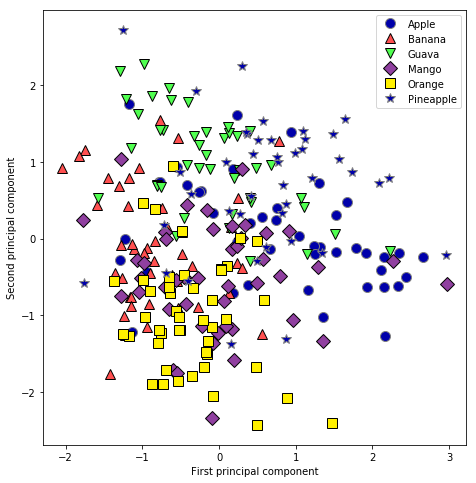

In [26]:
# Perform PCA on dataset

train_pca, test_pca = PCA_features(data, labels, x_val, x_train)

In [27]:
# Use PCA Features to train KNN Model

knn_3 = KNeighborsClassifier(n_neighbors=5)

# Train and evaluate the pca transform data to the original dataset labels

pca_train_model(knn_3, train_pca, test_pca, y_train, y_val)

Test set accuracy: 0.45


### Observations

After to creating the dataset of feature vectors using RGB color extraction, transforming the new dataset feature weights into new features weights using principal component analysis and then training a supervised learning model (i.e. KNN) on the new feature weights, the model prediction results were as follows:

- K = 1 (47% Accuracy)
- K = 3 (40% Accuracy)
- K = 5 (45% Accuracy)
 
Odd numbers for the value of K were used, so as to eliminate any cases of ties when computing the nearest neighbors

From these results it can be concluded that using a value of K which is less 3 or greater than 3 of the total number possible identifiable classes would be the best viable option. 

The ultimate reason why this new dataset accuracy was much lower than the Fruit365 dataset's, was because the new dataset (i.e. Google Downloaded Fruit Dataset) had alot of fruits in different classes with the same colors, and because of that it was difficult for the model to differentiate between the different classes.

To solve this problem adding for informative features (e.g. shape) would improve the performance.

### Google Downloaded Fruit Dataset with Kaggle's Fruit365 Dataset 

In [28]:
# Call pre-process raw input function

proc_contents = load_raw_data('C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/kaggle-data')

In [29]:
# New data as a csv file

CSV_FILE = "C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/kaggle_fruit_dataset.csv"

save_dataset(proc_contents, CSV_FILE)

In [30]:
# Download dataset as csv file

# Establish dataset column names

new_features = download_dataset(CSV_FILE, COL_NAMES)

In [31]:
# View first 5 rows of dataset

new_features.head()

,Red,Green,Blue,Label
0,1.1e+02,56,44,Apple
1,1.2e+02,71,51,Apple
2,1.2e+02,72,52,Apple
3,1.2e+02,73,52,Apple
4,1.2e+02,74,53,Apple


In [32]:
# Split feature vector into training and testing

k_new_strat_train, k_new_strat_test = splitter(new_features)

Train size: (1340,), test size: (237,)


In [33]:
# Prepare the splitted training set for the model

g_data, g_labels, k_data, k_labels = prepare_combined_data(d_new_strat_train, k_new_strat_train)

In [34]:
# Train/Fit dataset to supervised learning model (KNN)

knn, x_val, y_val, x_train, y_train = train_combined_model(g_data, g_labels, k_data, k_labels)

C:\Users\Clarkeinstein\Anaconda3\envs\MLClass\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


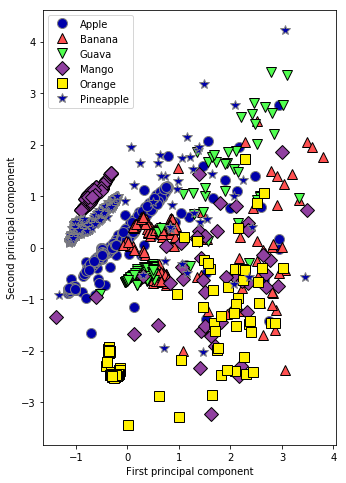

In [35]:
# Perform PCA on dataset

data = append_new_data(g_data, k_data)
labels = append_new_data(g_labels, k_labels)

train_pca, test_pca = PCA_features(data, labels, x_val, x_train)

In [36]:
# Use PCA Features to train KNN Model

knn_4 = KNeighborsClassifier(n_neighbors=1)

# Train and evaluate the pca transform data to the original dataset labels

pca_train_model(knn_4, train_pca, test_pca, y_train, y_val)

Test set accuracy: 0.47


### Observations

After to creating the dataset of feature vectors using RGB color extraction, transforming the new dataset feature weights into new features weights using principal component analysis and then training a supervised learning model (i.e. KNN) on the new feature weights, the model prediction results were as follows:

- K = 1 (47% Accuracy)
- K = 3 (47% Accuracy)
- K = 5 (45% Accuracy)
 
Odd numbers for the value of K were used, so as to eliminate any cases of ties when computing the nearest neighbors

From these results it can be concluded that using a value of K which is less than or equal to 3 of the total number possible identifiable classes would be the best viable option.

### Google Downloaded Fruit Dataset with Google Downloaded Augmented Dataset 

In [37]:
# Call pre-process raw input function

proc_contents = load_raw_data('C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/google-augmented-data')

In [38]:
# New data as a csv file

CSV_FILE = "C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/google_augmented_fruit_dataset.csv"

save_dataset(proc_contents, CSV_FILE)

In [39]:
# Download dataset as csv file

# Establish dataset column names

new_features = download_dataset(CSV_FILE, COL_NAMES)

In [40]:
# View first 5 rows of dataset

new_features.head()

,Red,Green,Blue,Label
0,2.2e+02,2e+02,83,Apple
1,1.7e+02,1e+02,89,Apple
2,2e+02,1.8e+02,1.8e+02,Apple
3,1.8e+02,1.1e+02,94,Apple
4,2.3e+02,1.4e+02,1.3e+02,Apple


In [41]:
# Split feature vector into training and testing

g_aug_new_strat_train, g_aug_new_strat_test = splitter(new_features)

Train size: (1004,), test size: (178,)


In [42]:
# Prepare the splitted training set for the model

g_data, g_labels, g_aug_data, g_aug_labels = prepare_combined_data(d_new_strat_train, g_aug_new_strat_train)

In [43]:
# Train/Fit dataset to supervised learning model (KNN)

knn, x_val, y_val, x_train, y_train = train_combined_model(g_data, g_labels, g_aug_data, g_aug_labels)

C:\Users\Clarkeinstein\Anaconda3\envs\MLClass\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


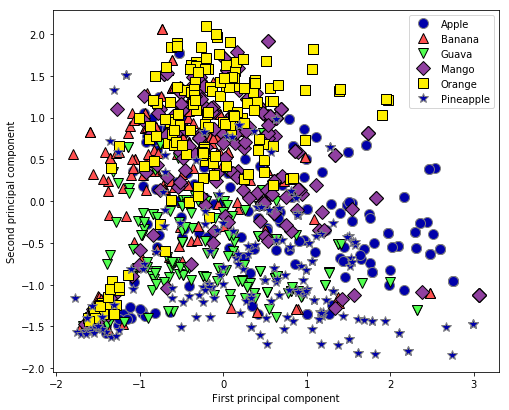

In [44]:
# Perform PCA on dataset

data = append_new_data(g_data, g_aug_data)
labels = append_new_data(g_labels, g_aug_labels)

train_pca, test_pca = PCA_features(data, labels, x_val, x_train)

In [45]:
# Use PCA Features to train KNN Model

knn_5 = KNeighborsClassifier(n_neighbors=1)

# Train and evaluate the pca transform data to the original dataset labels

pca_train_model(knn_5, train_pca, test_pca, y_train, y_val)

Test set accuracy: 0.88


### Observations

After to creating the dataset of feature vectors using RGB color extraction, transforming the new dataset feature weights into new features weights using principal component analysis and then training a supervised learning model (i.e. KNN) on the new feature weights, the model prediction results were as follows:

- K = 1 (88% Accuracy)
- K = 3 (75% Accuracy)
- K = 5 (53% Accuracy)
 
Odd numbers for the value of K were used, so as to eliminate any cases of ties when computing the nearest neighbors

From these results it can be concluded that using a value of K which is less than or equal to 3 of the total number possible identifiable classes would be the best viable option.

### Google Downloaded Fruit Dataset, Google Downloaded Augmented Dataset and Kaggle Fruit365 Dataset Combined

In [46]:
# Prepare the splitted training set for the model

g_data, g_labels, g_aug_data, g_aug_labels, k_data, k_labels = prepare_triple_data(d_new_strat_train, g_aug_new_strat_train, k_new_strat_train)

In [47]:
# Train/Fit dataset to supervised learning model (KNN)

knn, x_val, y_val, x_train, y_train = train_triple_model(g_data, g_labels, g_aug_data, g_aug_labels, k_data, k_labels)

C:\Users\Clarkeinstein\Anaconda3\envs\MLClass\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


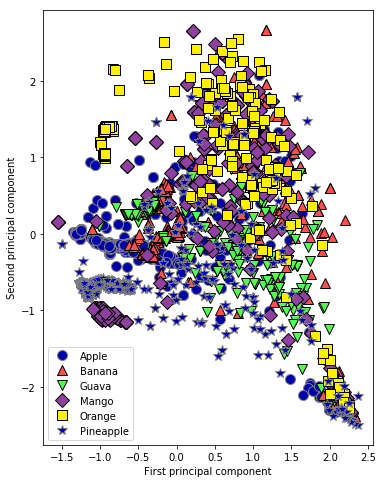

In [48]:
# Perform PCA on dataset

data = append_triple_data(g_data, g_aug_data, k_data)
labels = append_triple_data(g_labels, g_aug_labels, k_labels)

train_pca, test_pca = PCA_features(data, labels, x_val, x_train)

In [49]:
# Use PCA Features to train KNN Model

knn_6 = KNeighborsClassifier(n_neighbors=1)

# Train and evaluate the pca transform data to the original dataset labels

pca_train_model(knn_6, train_pca, test_pca, y_train, y_val)

Test set accuracy: 0.88


### Observations

After to creating the dataset of feature vectors using RGB color extraction, transforming the new dataset feature weights into new features weights using principal component analysis and then training a supervised learning model (i.e. KNN) on the new feature weights, the model prediction results were as follows:

- K = 1 (88% Accuracy)
- K = 3 (70% Accuracy)
- K = 5 (50% Accuracy)
 
Odd numbers for the value of K were used, so as to eliminate any cases of ties when computing the nearest neighbors

From these results it can be concluded that using a value of K which is less than or equal to 3 of the total number possible identifiable classes would be the best viable option.

### Google Downloaded Fruit Dataset with Google Downloaded Augmented Dataset (Apples)

In [50]:
# Call pre-process raw input function

proc_contents = load_single_raw_data('C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/google-augmented-data/Apple', 'Apple')

In [51]:
# New data as a csv file

CSV_FILE = "C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/apple_augmented_fruit_dataset.csv"

save_dataset(proc_contents, CSV_FILE)

In [52]:
# Download dataset as csv file

# Establish dataset column names

new_features = download_dataset(CSV_FILE, COL_NAMES)

In [53]:
# View first 5 rows of dataset

new_features.head()

,Red,Green,Blue,Label
0,2.2e+02,2e+02,83,Apple
1,1.7e+02,1e+02,89,Apple
2,2e+02,1.8e+02,1.8e+02,Apple
3,1.8e+02,1.1e+02,94,Apple
4,2.3e+02,1.4e+02,1.3e+02,Apple


In [54]:
# Split feature vector into training and testing

apple_strat_train, apple_strat_test = splitter(new_features)

Train size: (162,), test size: (29,)


In [55]:
# Prepare the splitted training set for the model

g_data, g_labels, apple_data, apple_labels = prepare_combined_data(d_new_strat_train, apple_strat_train)

In [56]:
# Train/Fit dataset to supervised learning model (KNN)

knn, x_val, y_val, x_train, y_train = train_combined_model(g_data, g_labels, apple_data, apple_labels)

C:\Users\Clarkeinstein\Anaconda3\envs\MLClass\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


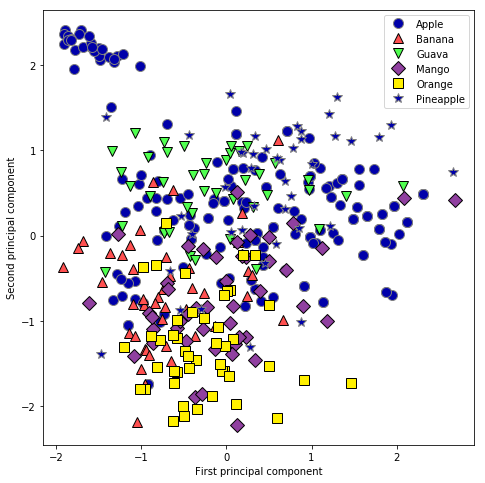

In [57]:
# Perform PCA on dataset

data = append_new_data(g_data, apple_data)
labels = append_new_data(g_labels, apple_labels)

train_pca, test_pca = PCA_features(data, labels, x_val, x_train)

In [60]:
# Use PCA Features to train KNN Model

knn_7 = KNeighborsClassifier(n_neighbors=1)

# Train and evaluate the pca transform data to the original dataset labels

pca_train_model(knn_7, train_pca, test_pca, y_train, y_val)

Test set accuracy: 0.35


### Observations

After to creating the dataset of feature vectors using RGB color extraction, transforming the new dataset feature weights into new features weights using principal component analysis and then training a supervised learning model (i.e. KNN) on the new feature weights with only the Apple Augmented Data added to the Google Downloaded Dataset, the model prediction results were as follows:

- K = 1 (35% Accuracy)
- K = 3 (35% Accuracy)
- K = 5 (33% Accuracy)
 
Odd numbers for the value of K were used, so as to eliminate any cases of ties when computing the nearest neighbors.

### Google Downloaded Fruit Dataset with Google Downloaded Augmented Dataset (Banana)

In [61]:
# Call pre-process raw input function

proc_contents = load_single_raw_data('C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/google-augmented-data/Banana', 'Banana')

In [62]:
# New data as a csv file

CSV_FILE = "C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/banana_augmented_fruit_dataset.csv"

save_dataset(proc_contents, CSV_FILE)

In [63]:
# Download dataset as csv file

# Establish dataset column names

new_features = download_dataset(CSV_FILE, COL_NAMES)

In [64]:
# View first 5 rows of dataset

new_features.head()

,Red,Green,Blue,Label
0,2.3e+02,2.1e+02,78,Banana
1,2.2e+02,2e+02,68,Banana
2,2e+02,2e+02,1.9e+02,Banana
3,1.9e+02,1.6e+02,78,Banana
4,2e+02,1.7e+02,63,Banana


In [65]:
# Split feature vector into training and testing

banana_strat_train, banana_strat_test = splitter(new_features)

Train size: (169,), test size: (30,)


In [66]:
# Prepare the splitted training set for the model

g_data, g_labels, banana_data, banana_labels = prepare_combined_data(d_new_strat_train, banana_strat_train)

In [67]:
# Train/Fit dataset to supervised learning model (KNN)

knn, x_val, y_val, x_train, y_train = train_combined_model(g_data, g_labels, banana_data, banana_labels)

C:\Users\Clarkeinstein\Anaconda3\envs\MLClass\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


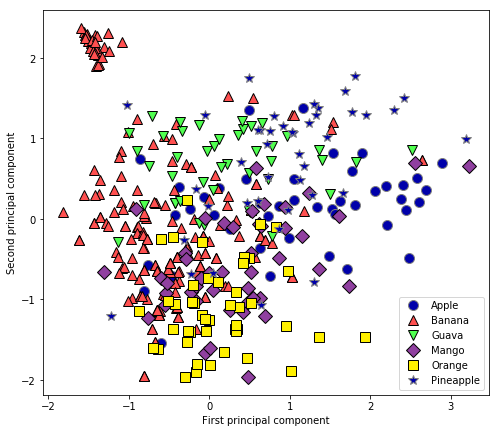

In [68]:
# Perform PCA on dataset

data = append_new_data(g_data, banana_data)
labels = append_new_data(g_labels, banana_labels)

train_pca, test_pca = PCA_features(data, labels, x_val, x_train)

In [71]:
# Use PCA Features to train KNN Model

knn_8 = KNeighborsClassifier(n_neighbors=5)

# Train and evaluate the pca transform data to the original dataset labels

pca_train_model(knn_8, train_pca, test_pca, y_train, y_val)

Test set accuracy: 0.42


### Observations

After to creating the dataset of feature vectors using RGB color extraction, transforming the new dataset feature weights into new features weights using principal component analysis and then training a supervised learning model (i.e. KNN) on the new feature weights with only the Banana Augmented Data added to the Google Downloaded Dataset, the model prediction results were as follows:

- K = 1 (38% Accuracy)
- K = 3 (40% Accuracy)
- K = 5 (42% Accuracy)
 
Odd numbers for the value of K were used, so as to eliminate any cases of ties when computing the nearest neighbors.

### Google Downloaded Fruit Dataset with Google Downloaded Augmented Dataset (Guava)

In [72]:
# Call pre-process raw input function

proc_contents = load_single_raw_data('C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/google-augmented-data/Guava', 'Guava')

In [73]:
# New data as a csv file

CSV_FILE = "C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/guava_augmented_fruit_dataset.csv"

save_dataset(proc_contents, CSV_FILE)

In [74]:
# Download dataset as csv file

# Establish dataset column names

new_features = download_dataset(CSV_FILE, COL_NAMES)

In [75]:
# View first 5 rows of dataset

new_features.head()

,Red,Green,Blue,Label
0,2e+02,2.1e+02,1.4e+02,Guava
1,1.8e+02,1.9e+02,74,Guava
2,2.2e+02,1.9e+02,82,Guava
3,1.8e+02,1.9e+02,1.2e+02,Guava
4,2e+02,2e+02,1.3e+02,Guava


In [76]:
# Split feature vector into training and testing

guava_strat_train, guava_strat_test = splitter(new_features)

Train size: (164,), test size: (29,)


In [77]:
# Prepare the splitted training set for the model

g_data, g_labels, guava_data, guava_labels = prepare_combined_data(d_new_strat_train, guava_strat_train)

In [78]:
# Train/Fit dataset to supervised learning model (KNN)

knn, x_val, y_val, x_train, y_train = train_combined_model(g_data, g_labels, guava_data, guava_labels)

C:\Users\Clarkeinstein\Anaconda3\envs\MLClass\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


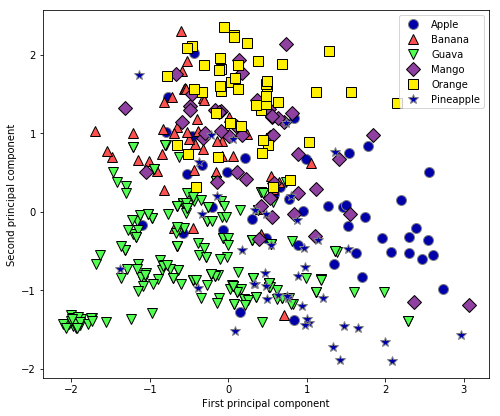

In [79]:
# Perform PCA on dataset

data = append_new_data(g_data, guava_data)
labels = append_new_data(g_labels, guava_labels)

train_pca, test_pca = PCA_features(data, labels, x_val, x_train)

In [82]:
# Use PCA Features to train KNN Model

knn_9 = KNeighborsClassifier(n_neighbors=1)

# Train and evaluate the pca transform data to the original dataset labels

pca_train_model(knn_9, train_pca, test_pca, y_train, y_val)

Test set accuracy: 0.40


### Observations

After to creating the dataset of feature vectors using RGB color extraction, transforming the new dataset feature weights into new features weights using principal component analysis and then training a supervised learning model (i.e. KNN) on the new feature weights with only the Guava Augmented Data added to the Google Downloaded Dataset, the model prediction results were as follows:

- K = 1 (40% Accuracy)
- K = 3 (38% Accuracy)
- K = 5 (35% Accuracy)
 
Odd numbers for the value of K were used, so as to eliminate any cases of ties when computing the nearest neighbors.

### Google Downloaded Fruit Dataset with Google Downloaded Augmented Dataset (Mango)

In [83]:
# Call pre-process raw input function

proc_contents = load_single_raw_data('C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/google-augmented-data/Mango', 'Mango')

In [84]:
# New data as a csv file

CSV_FILE = "C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/mango_augmented_fruit_dataset.csv"

save_dataset(proc_contents, CSV_FILE)

In [85]:
# Download dataset as csv file

# Establish dataset column names

new_features = download_dataset(CSV_FILE, COL_NAMES)

In [86]:
# View first 5 rows of dataset

new_features.head()

,Red,Green,Blue,Label
0,1.9e+02,1.6e+02,1e+02,Mango
1,1.8e+02,1.5e+02,68,Mango
2,2.1e+02,1.5e+02,35,Mango
3,2.2e+02,1.7e+02,1.1e+02,Mango
4,2.1e+02,1.7e+02,44,Mango


In [87]:
# Split feature vector into training and testing

mango_strat_train, mango_strat_test = splitter(new_features)

Train size: (172,), test size: (31,)


In [88]:
# Prepare the splitted training set for the model

g_data, g_labels, mango_data, mango_labels = prepare_combined_data(d_new_strat_train, mango_strat_train)

In [89]:
# Train/Fit dataset to supervised learning model (KNN)

knn, x_val, y_val, x_train, y_train = train_combined_model(g_data, g_labels, mango_data, mango_labels)

C:\Users\Clarkeinstein\Anaconda3\envs\MLClass\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


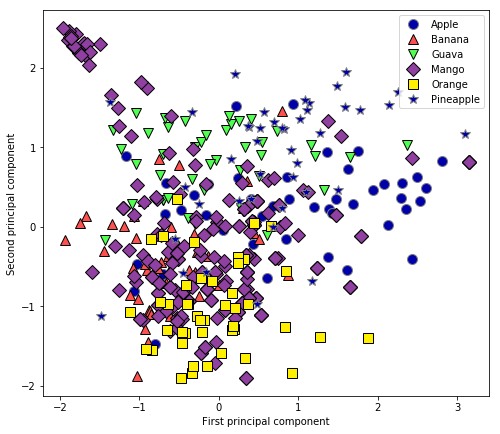

In [90]:
# Perform PCA on dataset

data = append_new_data(g_data, mango_data)
labels = append_new_data(g_labels, mango_labels)

train_pca, test_pca = PCA_features(data, labels, x_val, x_train)

In [93]:
# Use PCA Features to train KNN Model

knn_10 = KNeighborsClassifier(n_neighbors=1)

# Train and evaluate the pca transform data to the original dataset labels

pca_train_model(knn_10, train_pca, test_pca, y_train, y_val)

Test set accuracy: 0.35


### Observations

After to creating the dataset of feature vectors using RGB color extraction, transforming the new dataset feature weights into new features weights using principal component analysis and then training a supervised learning model (i.e. KNN) on the new feature weights with only the Mango Augmented Data added to the Google Downloaded Dataset, the model prediction results were as follows:

- K = 1 (35% Accuracy)
- K = 3 (30% Accuracy)
- K = 5 (38% Accuracy)
 
Odd numbers for the value of K were used, so as to eliminate any cases of ties when computing the nearest neighbors.

### Google Downloaded Fruit Dataset with Google Downloaded Augmented Dataset (Orange)

In [94]:
# Call pre-process raw input function

proc_contents = load_single_raw_data('C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/google-augmented-data/Orange', 'Orange')

In [95]:
# New data as a csv file

CSV_FILE = "C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/orange_augmented_fruit_dataset.csv"

save_dataset(proc_contents, CSV_FILE)

In [96]:
# Download dataset as csv file

# Establish dataset column names

new_features = download_dataset(CSV_FILE, COL_NAMES)

In [97]:
# View first 5 rows of dataset

new_features.head()

,Red,Green,Blue,Label
0,2.4e+02,1.9e+02,1.3e+02,Orange
1,2.5e+02,1.5e+02,34,Orange
2,2e+02,1.7e+02,64,Orange
3,2.4e+02,1.5e+02,27,Orange
4,2.2e+02,1.6e+02,85,Orange


In [98]:
# Split feature vector into training and testing

orange_strat_train, orange_strat_test = splitter(new_features)

Train size: (173,), test size: (31,)


In [99]:
# Prepare the splitted training set for the model

g_data, g_labels, orange_data, orange_labels = prepare_combined_data(d_new_strat_train, orange_strat_train)

In [100]:
# Train/Fit dataset to supervised learning model (KNN)

knn, x_val, y_val, x_train, y_train = train_combined_model(g_data, g_labels, orange_data, orange_labels)

C:\Users\Clarkeinstein\Anaconda3\envs\MLClass\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


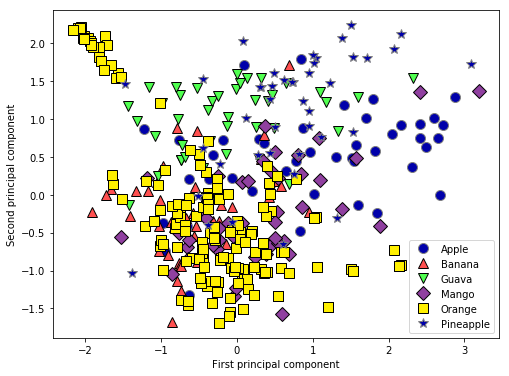

In [101]:
# Perform PCA on dataset

data = append_new_data(g_data, orange_data)
labels = append_new_data(g_labels, orange_labels)

train_pca, test_pca = PCA_features(data, labels, x_val, x_train)

In [104]:
# Use PCA Features to train KNN Model

knn_11 = KNeighborsClassifier(n_neighbors=5)

# Train and evaluate the pca transform data to the original dataset labels

pca_train_model(knn_11, train_pca, test_pca, y_train, y_val)

Test set accuracy: 0.38


### Observations

After to creating the dataset of feature vectors using RGB color extraction, transforming the new dataset feature weights into new features weights using principal component analysis and then training a supervised learning model (i.e. KNN) on the new feature weights with only the Orange Augmented Data added to the Google Downloaded Dataset, the model prediction results were as follows:

- K = 1 (35% Accuracy)
- K = 3 (38% Accuracy)
- K = 5 (38% Accuracy)
 
Odd numbers for the value of K were used, so as to eliminate any cases of ties when computing the nearest neighbors.

### Google Downloaded Fruit Dataset with Google Downloaded Augmented Dataset (Pineapple)

In [105]:
# Call pre-process raw input function

proc_contents = load_single_raw_data('C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/google-augmented-data/Pineapple', 'Pineapple')

In [106]:
# New data as a csv file

CSV_FILE = "C:/Users/Clarkeinstein/Major Project 2018/Fruit Classifier/pineapple_augmented_fruit_dataset.csv"

save_dataset(proc_contents, CSV_FILE)

In [107]:
# Download dataset as csv file

# Establish dataset column names

new_features = download_dataset(CSV_FILE, COL_NAMES)

In [108]:
# View first 5 rows of dataset

new_features.head()

,Red,Green,Blue,Label
0,1.5e+02,1.4e+02,95,Pineapple
1,1.1e+02,1e+02,70,Pineapple
2,2e+02,2e+02,1.9e+02,Pineapple
3,1.5e+02,1.3e+02,76,Pineapple
4,1.4e+02,1.1e+02,51,Pineapple


In [109]:
# Split feature vector into training and testing

pineapple_strat_train, pineapple_strat_test = splitter(new_features)

Train size: (163,), test size: (29,)


In [110]:
# Prepare the splitted training set for the model

g_data, g_labels, pineapple_data, pineapple_labels = prepare_combined_data(d_new_strat_train, pineapple_strat_train)

In [111]:
# Train/Fit dataset to supervised learning model (KNN)

knn, x_val, y_val, x_train, y_train = train_combined_model(g_data, g_labels, pineapple_data, pineapple_labels)

C:\Users\Clarkeinstein\Anaconda3\envs\MLClass\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


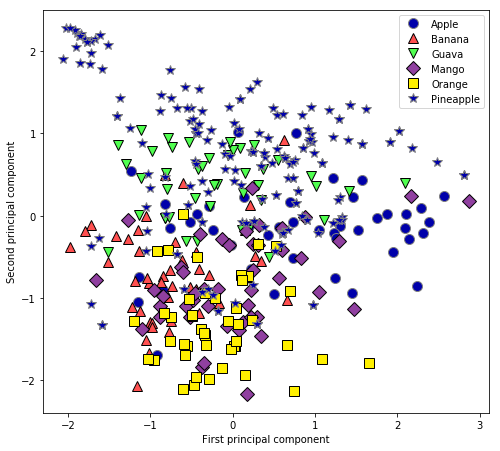

In [112]:
# Perform PCA on dataset

data = append_new_data(g_data, pineapple_data)
labels = append_new_data(g_labels, pineapple_labels)

train_pca, test_pca = PCA_features(data, labels, x_val, x_train)

In [115]:
# Use PCA Features to train KNN Model

knn_12 = KNeighborsClassifier(n_neighbors=5)

# Train and evaluate the pca transform data to the original dataset labels

pca_train_model(knn_12, train_pca, test_pca, y_train, y_val)

Test set accuracy: 0.42


### Observations

After to creating the dataset of feature vectors using RGB color extraction, transforming the new dataset feature weights into new features weights using principal component analysis and then training a supervised learning model (i.e. KNN) on the new feature weights with only the Pineapple Augmented Data added to the Google Downloaded Dataset, the model prediction results were as follows:

- K = 1 (40% Accuracy)
- K = 3 (40% Accuracy)
- K = 5 (42% Accuracy)
 
Odd numbers for the value of K were used, so as to eliminate any cases of ties when computing the nearest neighbors.